<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/LeNet5_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from keras.datasets.mnist import load_data
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix

In [8]:
(xtrain, ytrain), (xtest, ytest) = load_data()
xtrain = xtrain.astype('float32') /255.
xtest = xtest.astype('float32') /255.
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

print('Original Dimensions : ',xtrain.shape)

xtrain = np.expand_dims(xtrain, axis=3)
xtest = np.expand_dims(xtest, axis=3)

print(xtrain.shape)

11493376/11490434 [==============================] - 0s 0us/step
Original Dimensions :  (60000, 28, 28)
(60000, 28, 28, 1)


In [9]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size = 5, strides = 1, activation = 'tanh', input_shape = (28, 28, 1), padding = 'same'))
model.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
model.add(Conv2D(filters=16, kernel_size = 5, strides = 1, activation = 'tanh', padding = 'valid'))
model.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
model.add(Conv2D(filters = 120, kernel_size = 5, strides = 1, activation = 'tanh', padding = 'valid'))
model.add(Flatten())
model.add(Dense(units = 84, activation = 'tanh', ))
model.add(Dense(units = 10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 84)                1

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
hist = model.fit(xtrain, ytrain, batch_size=32, epochs=20, validation_data=(xtest, ytest), verbose=2, shuffle=True)

Epoch 1/20
1875/1875 - 5s - loss: 0.6363 - accuracy: 0.8316 - val_loss: 0.3029 - val_accuracy: 0.9143
Epoch 2/20
1875/1875 - 5s - loss: 0.2689 - accuracy: 0.9205 - val_loss: 0.2150 - val_accuracy: 0.9360
Epoch 3/20
1875/1875 - 5s - loss: 0.2000 - accuracy: 0.9414 - val_loss: 0.1610 - val_accuracy: 0.9526
Epoch 4/20
1875/1875 - 5s - loss: 0.1556 - accuracy: 0.9543 - val_loss: 0.1283 - val_accuracy: 0.9622
Epoch 5/20
1875/1875 - 5s - loss: 0.1264 - accuracy: 0.9635 - val_loss: 0.1061 - val_accuracy: 0.9692
Epoch 6/20
1875/1875 - 5s - loss: 0.1065 - accuracy: 0.9686 - val_loss: 0.0901 - val_accuracy: 0.9733
Epoch 7/20
1875/1875 - 5s - loss: 0.0920 - accuracy: 0.9730 - val_loss: 0.0806 - val_accuracy: 0.9752
Epoch 8/20
1875/1875 - 5s - loss: 0.0816 - accuracy: 0.9760 - val_loss: 0.0713 - val_accuracy: 0.9785
Epoch 9/20
1875/1875 - 5s - loss: 0.0735 - accuracy: 0.9780 - val_loss: 0.0652 - val_accuracy: 0.9804
Epoch 10/20
1875/1875 - 5s - loss: 0.0669 - accuracy: 0.9803 - val_loss: 0.0595 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
0.11403674185276032
Training and validation loss    :  0.11403674185276032 0.08764940928667783
Training and validation accuracy:  0.9674249976873398 0.9735650032758713
313/313 [==============================] - 1s 2ms/step - loss: 0.0404 - accuracy: 0.9867
accuracy : [0.040402933955192566, 0.9866999983787537]


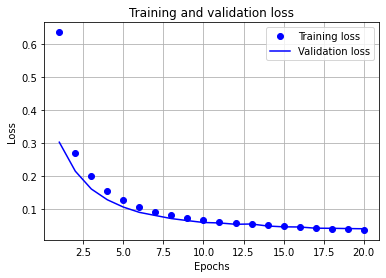

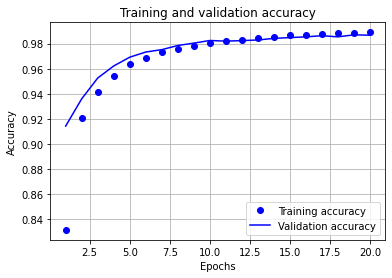

In [11]:
print(hist.history.keys())
loss = hist.history['loss']
print(np.mean(loss))
accuracy = hist.history['accuracy']
val_loss = hist.history['val_loss']
val_accuracy = hist.history['val_accuracy']

print('Training and validation loss    : ', np.mean(loss), np.mean(val_loss))
print('Training and validation accuracy: ', np.mean(accuracy), np.mean(val_accuracy))

ypred = model.predict(xtest)
score = model.evaluate(xtest, ytest)
print('accuracy :', score)

epochs = range(1, len(loss)+1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

Confusion Matrix


<Figure size 432x288 with 0 Axes>

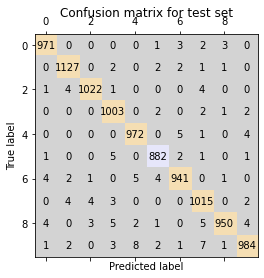

In [17]:
print('Confusion Matrix')

cmap = ListedColormap(['lightgrey', 'silver', 'ghostwhite', 'lavender', 'wheat'])

cm = confusion_matrix(ytest.argmax(1), ypred.argmax(1))
plt.figure()
plt.matshow(cm, cmap=cmap)

for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    plt.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
  
plt.title('Confusion matrix for test set')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()